![Imgur](https://i.imgur.com/NH1h2dk.png)

## ①　Introduction
The dataset contains information about golf club members and their golf-related and weather-related statistics.

🎯　Your goal is to **cluster the types of the golfer** in that golf club.

You are free to add/remove sections and made any modification to this notebook. Only your final submission will be graded. This notebook will not be graded.

## ②　Setting Up the Environment
These are all the libraries used in the lecture.

In [1]:
# Basic Libraries (L1)
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy  as np
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing (L2)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder

# Data Exploration (L3)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, norm, lognorm, expon, uniform, gamma
from scipy.stats import probplot, chi2_contingency

# Basic Classifiers & Regressors (L4-5)
from sklearn.linear_model import LogisticRegression,     LinearRegression
from sklearn.linear_model import Lasso, LassoCV,         ElasticNet, ElasticNetCV
from sklearn.naive_bayes  import BernoulliNB,            GaussianNB
from sklearn.neighbors    import KNeighborsClassifier,   KNeighborsRegressor
from sklearn.dummy        import DummyClassifier,        DummyRegressor
from sklearn.tree         import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.svm          import SVC,                    SVR

# Ensemble Classifiers & Regressors (L6)
from sklearn.ensemble     import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble     import RandomForestClassifier,     RandomForestRegressor
from sklearn.ensemble     import StackingClassifier,         StackingRegressor
from sklearn.ensemble     import AdaBoostClassifier,         AdaBoostRegressor
from sklearn.ensemble     import BaggingClassifier,          BaggingRegressor
from sklearn.ensemble     import VotingClassifier,           VotingRegressor
# from catboost             import CatBoostClassifier,         CatBoostRegressor
# import lightgbm as lgb
# import xgboost  as xgb

# Classification & Regression Metrics (L7)
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics      import confusion_matrix
from sklearn.metrics      import roc_curve, roc_auc_score

from sklearn.metrics      import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics      import mean_squared_error, mean_squared_log_error
from sklearn.metrics      import r2_score

# Model Calibration (L7)
from sklearn.calibration  import calibration_curve
from sklearn.metrics      import brier_score_loss, log_loss

# Model Selection & Validation (L7)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut

# Hyperparameter Optimization (L7)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Multiclass Classification (L8)
from sklearn.multiclass      import OneVsOneClassifier,    OneVsRestClassifier
from sklearn.metrics         import classification_report, precision_recall_fscore_support

# Model Weighting (L8)
from sklearn.utils.class_weight import compute_sample_weight

# Resampling Techniques (L8)
from imblearn.over_sampling  import RandomOverSampler,  SMOTE,    ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.combine        import SMOTEENN

# Pipeline (L9)
from imblearn.pipeline       import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer

# Feature Selection (L9)
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel
from sklearn.feature_selection import f_classif, f_regression, chi2
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector

# Dimensionality Reduction (L9)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition         import PCA, KernelPCA
from sklearn.manifold              import TSNE, MDS, Isomap
from umap                          import UMAP

# Clustering (L10)
from sklearn.cluster          import KMeans, MiniBatchKMeans
from sklearn.cluster          import AgglomerativeClustering
from sklearn.cluster          import DBSCAN, OPTICS, MeanShift
from sklearn.metrics          import silhouette_score, silhouette_samples
from sklearn.metrics          import calinski_harabasz_score, make_scorer
from sklearn.feature_selection import VarianceThreshold

## ③　Loading (Training) Dataset

In [2]:
# Load the train dataset
train_url = "/kaggle/input/clustering-of-golfers-type/train.csv"
df_train = pd.read_csv(train_url, index_col=0)

target_col = 'Cluster'
X_train = df_train.copy()

df_train

,YearsOfExperience,HandicapIndex,AvgDrivingDistance,AveragePuttsPerRound,DrivingAccuracy,GreensInRegulation,TournamentWins,PreferredTemperature,PreferredHumidity,PreferredWindSpeed,RainTolerance,SunlightPreference,PreferredCloudCover,ExtremeTempComfort
MembershipID,,,,,,,,,,,,,,
NL82085,9.7,1.9,333.5,27.4,70.5,71.6,0,61.8,57,3.6,7.7,8.1,40.1,9.2
XR21273,22.5,18.6,187.9,32.7,54.6,70.4,0,69.6,48,1.1,4.2,5.1,58.2,4.4
QG67784,3.3,15.9,216.4,31.7,62.3,58.2,0,62.8,61,2.8,4.3,4.8,34.2,6.7
ZE82770,4.5,17.0,208.1,34.6,61.6,68.2,0,61.6,59,2.4,4.9,6.1,51.7,6.4
CL59181,4.2,1.3,344.9,25.0,68.6,67.7,0,61.4,29,3.3,9.8,7.3,34.3,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KQ71967,26.8,1.0,297.7,27.2,67.3,77.6,2,65.0,42,1.5,8.3,8.1,31.3,7.1
DN02233,1.4,18.1,197.1,27.0,82.1,50.3,0,71.3,59,4.1,4.7,6.9,35.6,8.4
MH82771,16.3,4.7,262.7,27.4,92.0,92.2,1,52.3,51,3.5,7.0,5.0,75.1,7.8


## ④　Exploratory Data Analysis (Before Preprocessing)

In [3]:
# Perform EDA here if you want.
print(df_train.info())
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, NL82085 to UE15643
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YearsOfExperience     835 non-null    float64
 1   HandicapIndex         835 non-null    float64
 2   AvgDrivingDistance    835 non-null    float64
 3   AveragePuttsPerRound  835 non-null    float64
 4   DrivingAccuracy       835 non-null    float64
 5   GreensInRegulation    835 non-null    float64
 6   TournamentWins        835 non-null    int64  
 7   PreferredTemperature  835 non-null    float64
 8   PreferredHumidity     835 non-null    int64  
 9   PreferredWindSpeed    835 non-null    float64
 10  RainTolerance         835 non-null    float64
 11  SunlightPreference    835 non-null    float64
 12  PreferredCloudCover   835 non-null    float64
 13  ExtremeTempComfort    835 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 97.9+ KB
None


,YearsOfExperience,HandicapIndex,AvgDrivingDistance,AveragePuttsPerRound,DrivingAccuracy,GreensInRegulation,TournamentWins,PreferredTemperature,PreferredHumidity,PreferredWindSpeed,RainTolerance,SunlightPreference,PreferredCloudCover,ExtremeTempComfort
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,10.273533,12.914731,263.436168,30.949940,60.960479,62.547784,0.853892,63.865749,54.325749,2.851377,5.699641,5.771138,55.600240,5.885389
std,8.789805,6.754933,51.599492,4.503352,20.118443,18.287921,2.738870,7.842366,15.684746,1.758803,2.632993,2.488225,17.397392,2.490178
min,0.600000,0.000000,142.600000,19.200000,0.000000,0.000000,0.000000,50.000000,20.000000,0.300000,0.000000,0.000000,9.200000,0.000000
25%,3.800000,7.250000,217.900000,27.400000,50.600000,51.900000,0.000000,59.000000,43.000000,1.600000,3.900000,4.200000,43.150000,4.200000
50%,7.600000,14.300000,262.400000,30.500000,62.700000,63.100000,0.000000,64.300000,55.000000,2.500000,5.900000,6.200000,54.900000,6.200000
75%,13.750000,17.900000,314.800000,33.950000,72.400000,74.100000,1.000000,69.550000,64.000000,3.700000,7.800000,7.600000,67.700000,7.800000
max,40.000000,30.300000,364.700000,45.400000,100.000000,100.000000,53.000000,90.000000,100.000000,16.800000,10.000000,10.000000,100.000000,10.000000


## ⑤　Preprocessing Pipeline

In [4]:
# Drop the features that have small correlations with each other
corr_matrix = X_train.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.6)]
X_train = X_train.drop(to_drop, axis=1)
X_train.columns

Index(['YearsOfExperience', 'HandicapIndex', 'AvgDrivingDistance',
       'DrivingAccuracy', 'GreensInRegulation', 'TournamentWins',
       'PreferredTemperature', 'PreferredHumidity', 'PreferredWindSpeed',
       'SunlightPreference', 'PreferredCloudCover'],
      dtype='object')

In [5]:
# Create ColumnTransformer for preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('min_max', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Making Transformation Pipeline
transformation_pipeline = make_pipeline(
    preprocessor, # You can add dimensionality reduction or feature selection here
    PCA(n_components=0.3)
)

# Preprocess Data
X_processed = transformation_pipeline.fit_transform(X_train)
X_processed

array([[-0.41280938,  0.18355344],
       [ 0.01973055, -0.1661846 ],
       [ 0.16938545, -0.20802319],
       ...,
       [-0.26639165, -0.03467171],
       [ 0.26743142,  0.22898455],
       [ 0.30496671,  0.57122214]])

## ⑥　Exploratory Data Analysis (After Preprocessing)

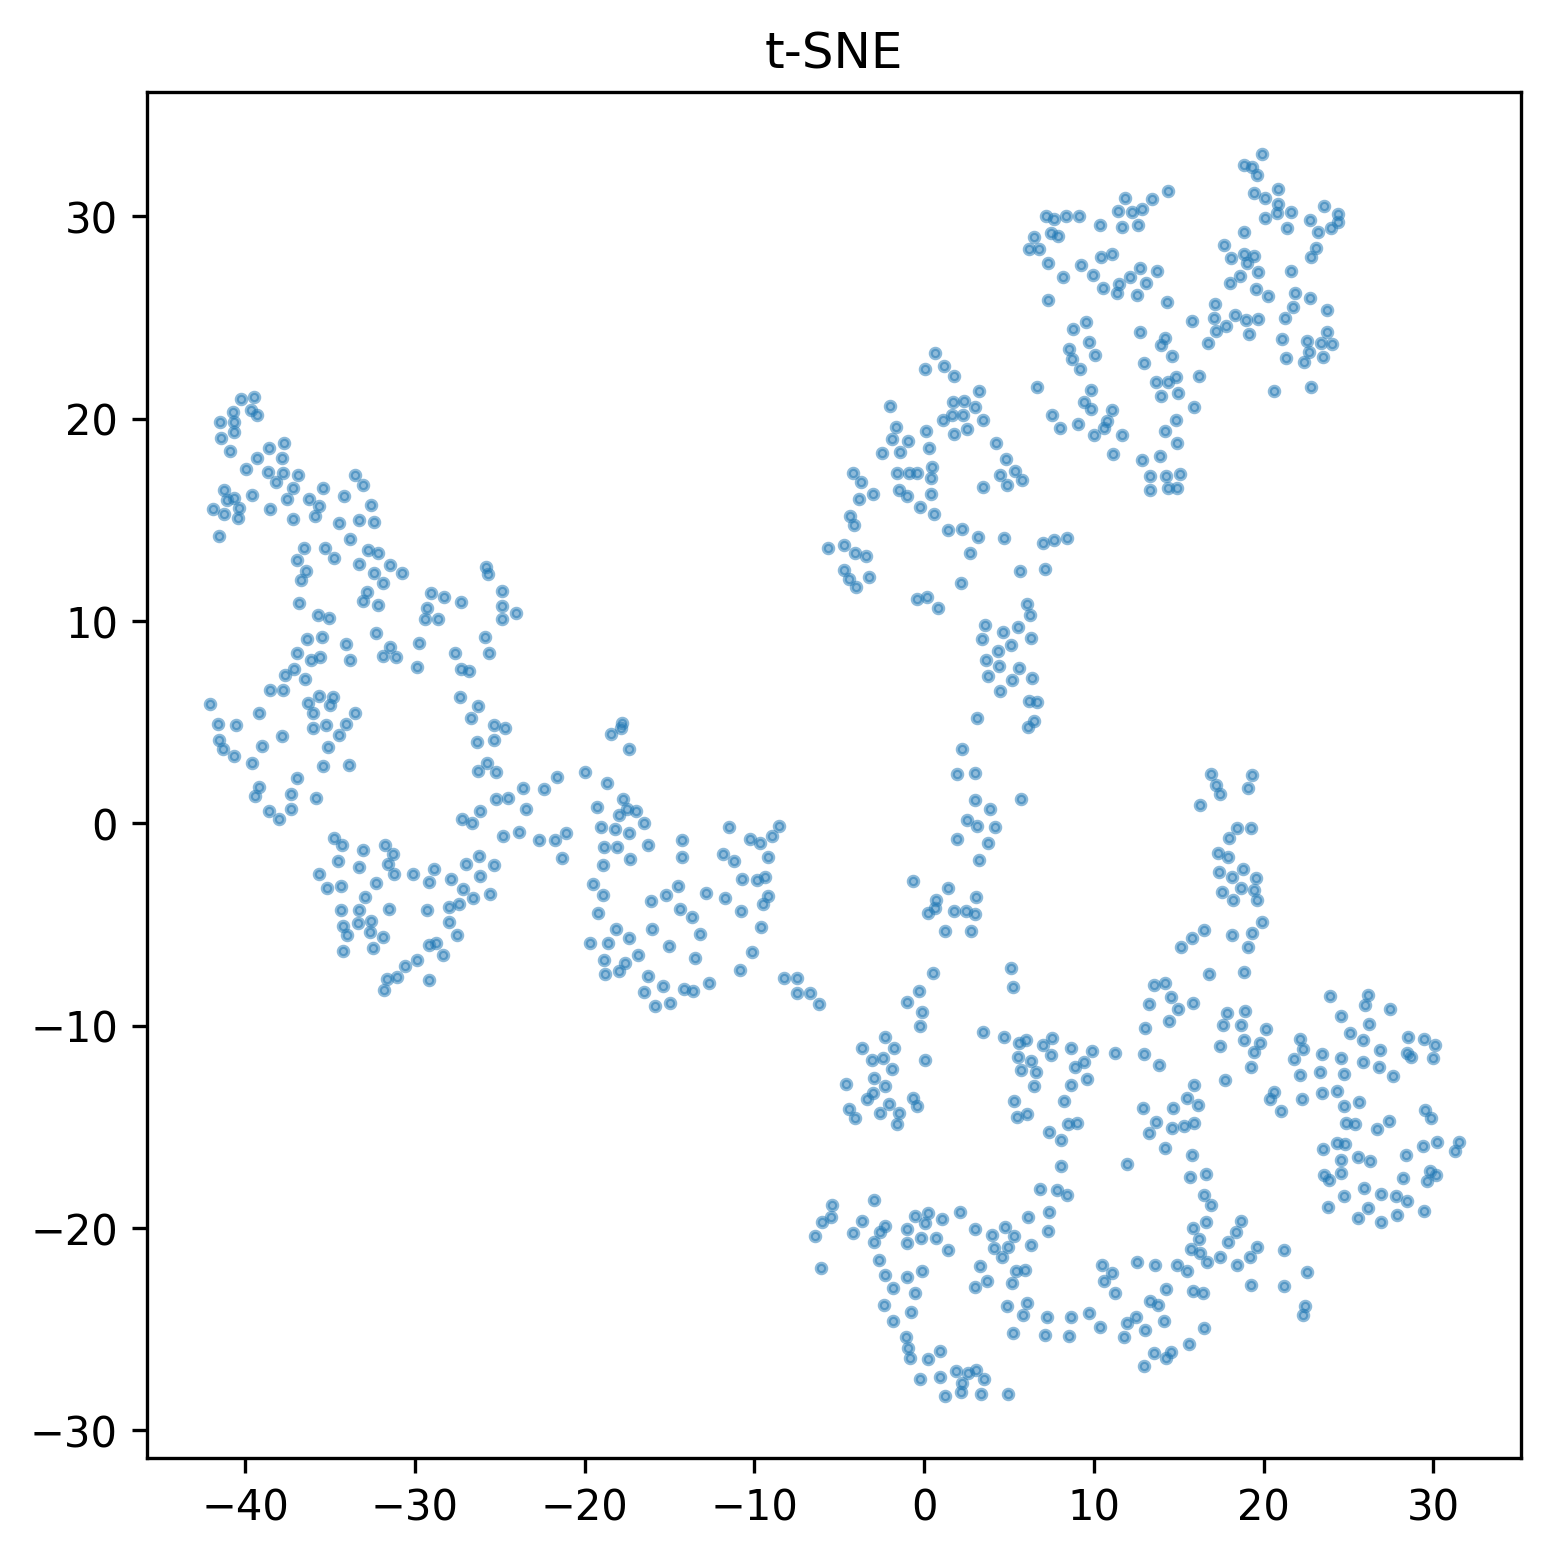

In [6]:
# Initialize dimensionality reduction methods
methods = [
    ('t-SNE', TSNE(n_components=2, random_state=0)),
    #('UMAP', UMAP(n_components=2, random_state=0)),
    #('MDS', MDS(n_components=2, random_state=0)),
    #('Isomap', Isomap(n_components=2))
]

# Plotting
plt.figure(figsize=(10, 10), dpi=300)

for i, (title, method) in enumerate(methods, 1):
    X_transformed = method.fit_transform(X_processed)
    plt.subplot(2,2, i)
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=5, alpha=0.5)
    plt.title(title)

plt.tight_layout()
plt.show()


## ⑦　(Optional) Manual Hyperparameter Tuning 

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Assuming you want to find the optimal number of clusters
# You can loop through different values of n_clusters and find the best one
best_score = -1
best_n_clusters = -1

for n_clusters in range(2, 11):  # You can adjust the range based on your problem
    # Create a clustering model (you can use a different algorithm if needed)
    model = KMeans(n_clusters=n_clusters)
    # Fit the model to your preprocessed data
    model.fit(X_processed)

    # Calculate the silhouette score
    score = silhouette_score(X_processed, model.labels_)

    # Update the best score and the corresponding 'n_clusters' if the current score is better
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

# Now you can use the best number of clusters in your final clustering model
final_model = KMeans(n_clusters=best_n_clusters)
final_model.fit(X_processed)

# Print the best number of clusters and the corresponding score
print("Best number of clusters:", best_n_clusters)
print("Best Score:", best_score)

Best number of clusters: 3
Best Score: 0.5487873088989818


## ⑧　Making Prediction

In [8]:
model = KMeans(n_clusters=best_n_clusters, random_state=41)

# Fit the model to the training set
y_pred = model.fit_predict(X_processed)

## ⑨　(Optional) Post-Clustering Analysis

### Scatter Plot (colored by clusters)

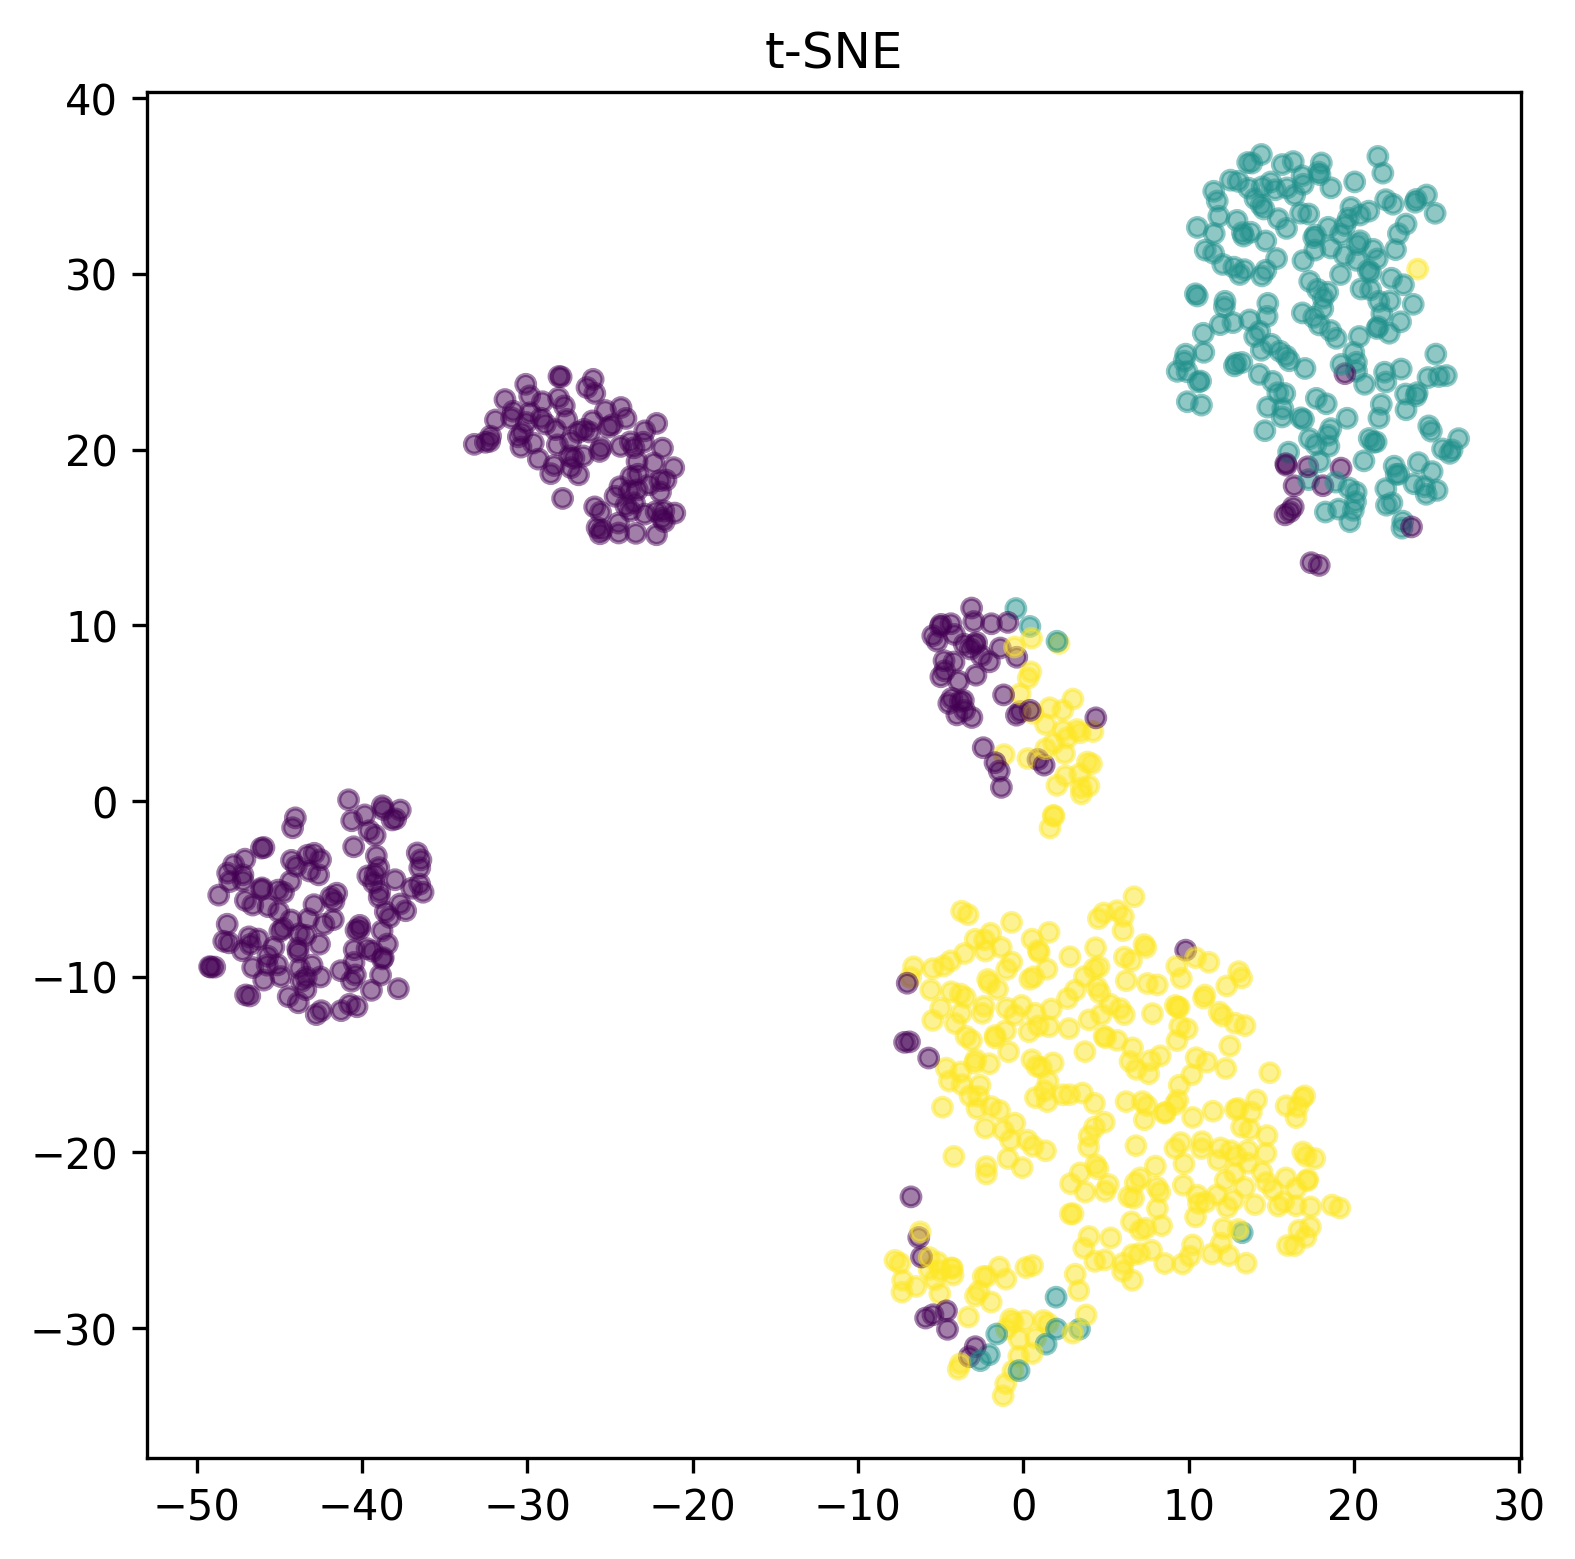

In [9]:
import matplotlib as mpl

# Prepare your data
X_processed = preprocessor.fit_transform(X_train)

# Initialize dimensionality reduction methods
methods = [
    ('t-SNE', TSNE(n_components=2, random_state=0)),
    #('UMAP', UMAP(n_components=2, random_state=0)),
    #('MDS', MDS(n_components=2, random_state=0)),
    #('Isomap', Isomap(n_components=2))
]

# Plotting
plt.figure(figsize=(10, 10), dpi=300)

for i, (title, method) in enumerate(methods, 1):
    X_transformed = method.fit_transform(X_processed)
    plt.subplot(2, 2, i)
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=20, alpha=0.5, c=y_pred)
    plt.title(title)

plt.tight_layout()
plt.show()

### Silhouette Scores Histogram

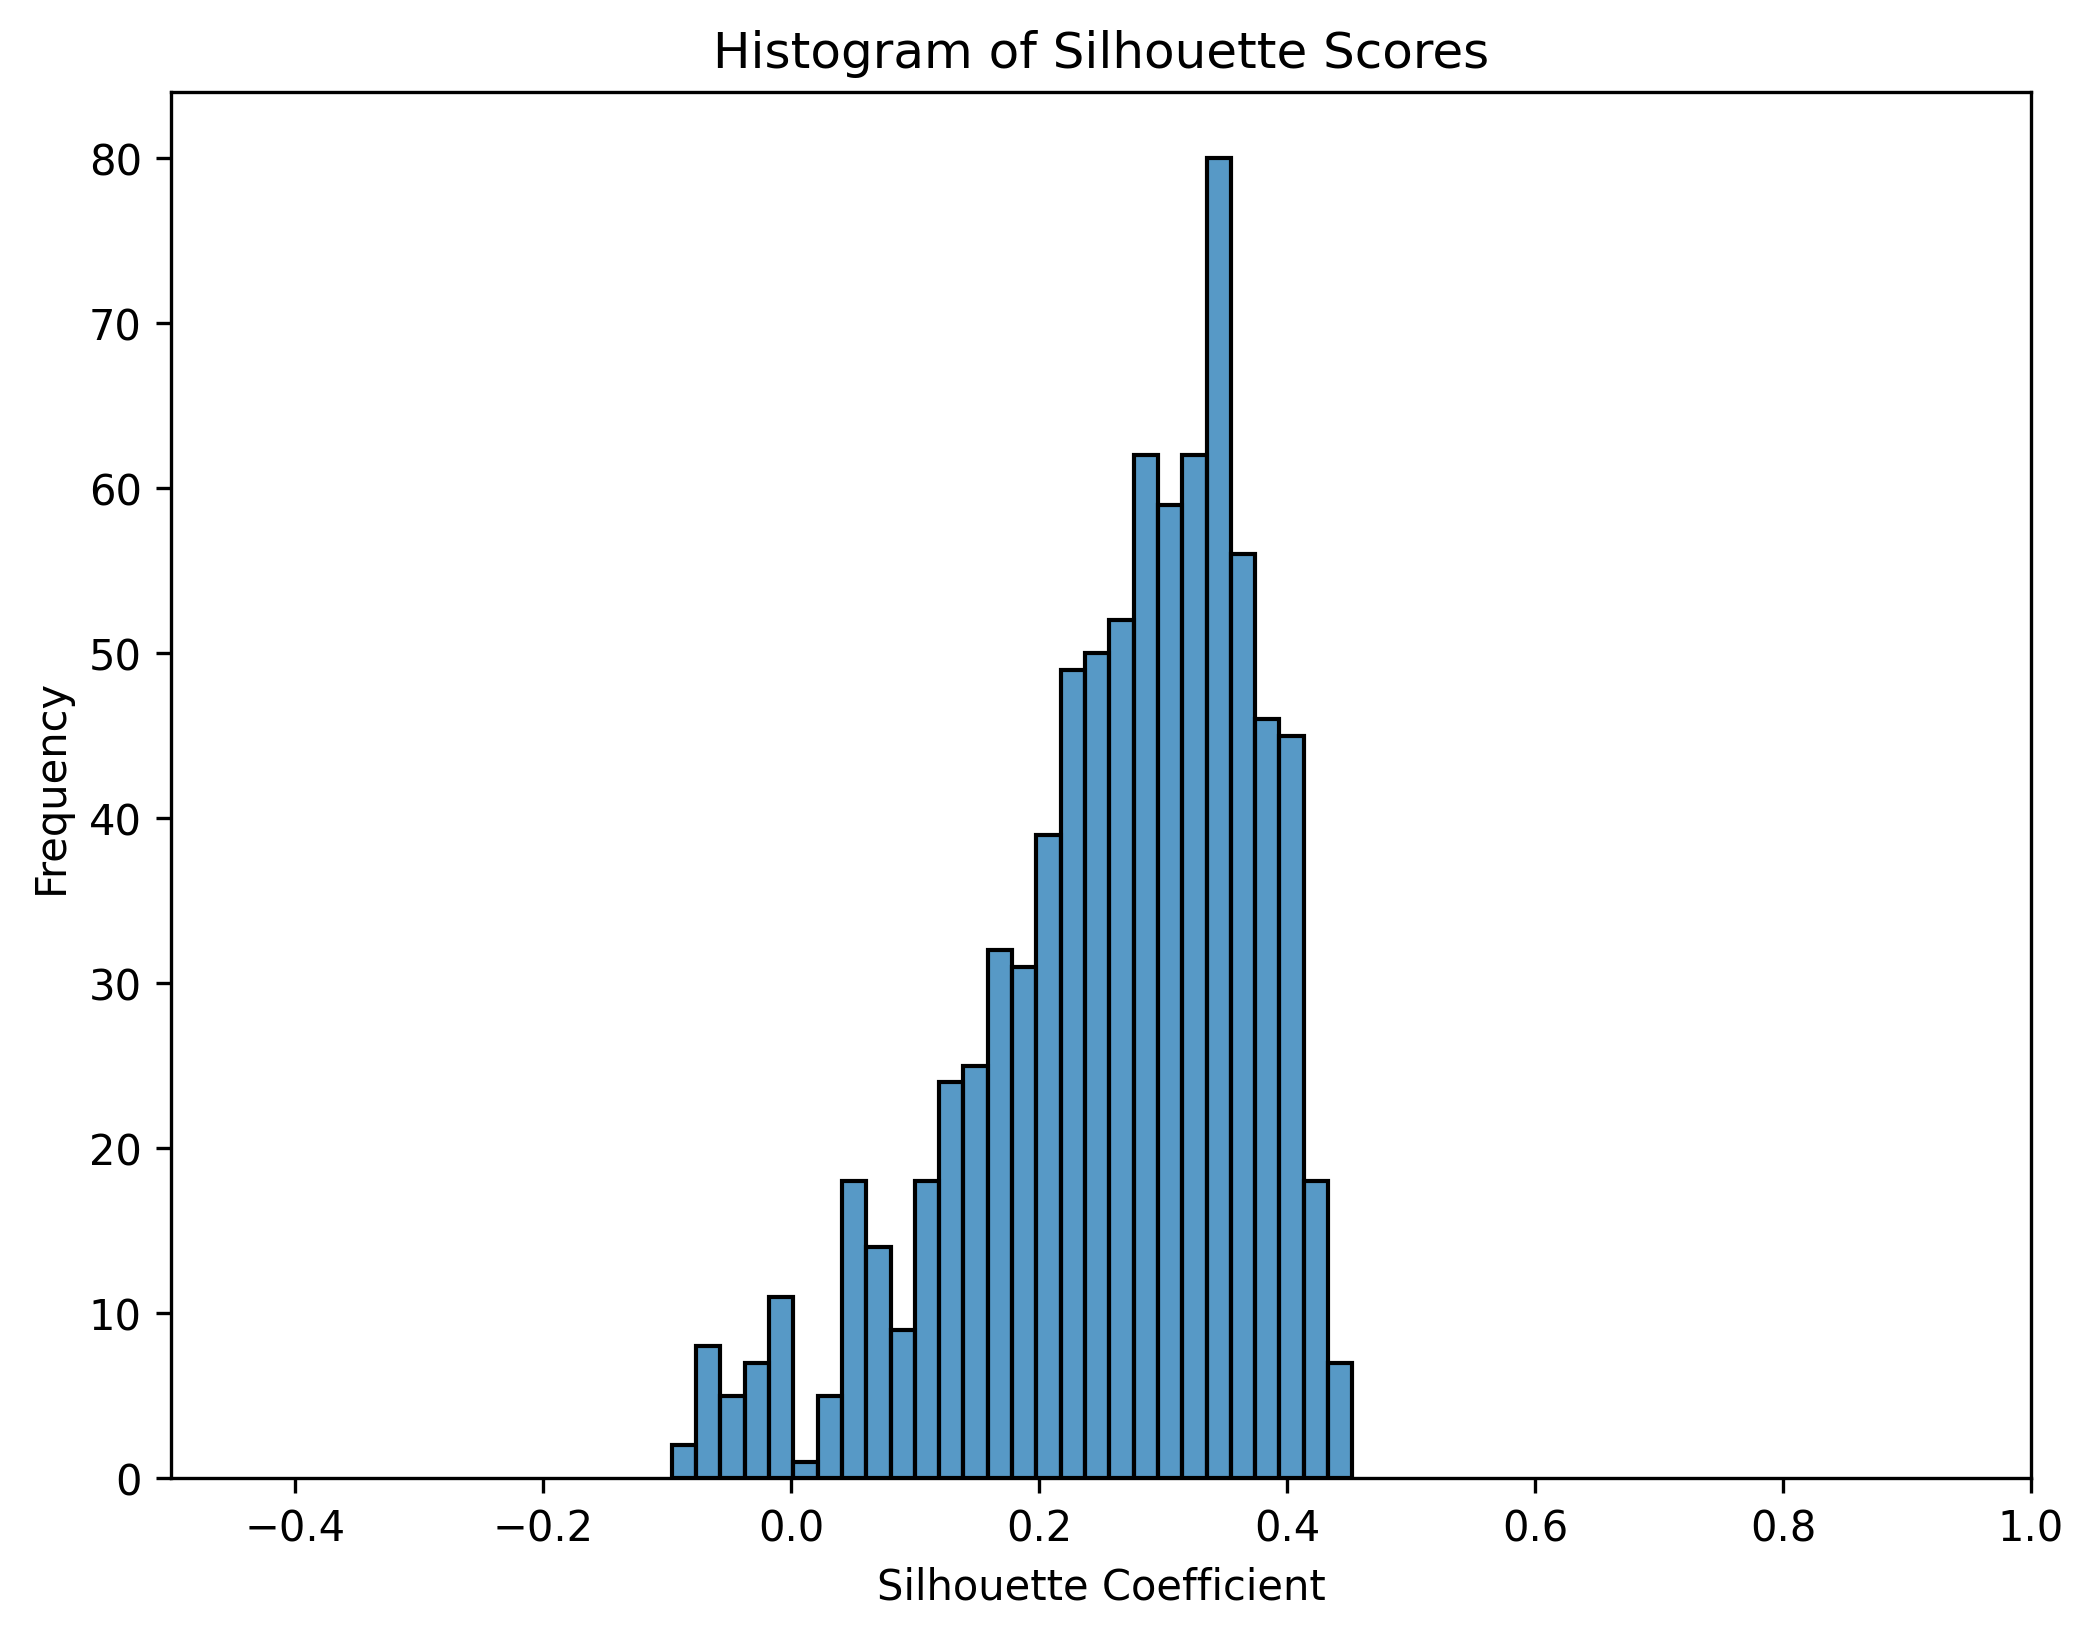

In [10]:
# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X_processed, y_pred)

# Create a histogram of the silhouette scores
plt.figure(figsize=(8, 6), dpi=300)
sns.histplot(silhouette_vals, bins=int(np.sqrt(y_pred.size)), kde=False)
plt.xlim(-0.5,1)
plt.title('Histogram of Silhouette Scores')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Frequency')

plt.show()

### Features Statistics for each Cluster

In [11]:
# Add the cluster labels to your original DataFrame
X_trained = X_train.copy()
X_trained['Cluster'] = y_pred

# Group by the cluster label and describe each cluster
cluster_description = X_trained.groupby('Cluster').describe().round(1)

cluster_description

YearsOfExperience                                          \
                    count  mean  std  min   25%   50%   75%   max   
Cluster                                                             
0                   277.0  17.6  9.8  4.1  10.3  14.5  23.3  40.0   
1                   214.0   9.4  5.4  1.8   5.3   8.1  11.7  31.3   
2                   344.0   4.9  4.6  0.6   2.3   3.5   5.3  32.8   

        HandicapIndex                                          \
                count  mean  std  min   25%   50%   75%   max   
Cluster                                                         
0               277.0   5.5  4.7  0.0   1.4   4.8   7.4  20.3   
1               214.0  15.0  3.7  7.0  12.5  15.0  17.4  25.4   
2               344.0  17.6  4.0  5.9  14.7  17.5  20.4  30.3   

        AvgDrivingDistance                                                  \
                     count   mean   std    min    25%    50%    75%    max   
Cluster                                                                      
0                    277.0  280.9  36.5  190.2  257.0  277.1  314.6  344.9   
1                    214.0  318.2  18.6  237.3  310.0  321.1  328.7  364.7   
2                    344.0  215.3  27.4  142.6  197.1  214.4  233.7  325.2   

        DrivingAccuracy                                             \
                  count  mean   std   min   25%   50%   75%    max   
Cluster                                                              
0                 277.0  77.3  13.7  24.8  68.0  76.5  89.4   99.3   
1                 214.0  40.1  19.7   0.0  27.4  41.6  54.2  100.0   
2                 344.0  60.8  10.2  31.0  53.8  61.2  66.8  100.0   

        GreensInRegulation                                             \
                     count  mean   std   min   25%   50%   75%    max   
Cluster                                                                 
0                    277.0  75.5  15.7  24.4  66.0  76.9  89.0   99.9   
1                    214.0  47.7  19.6   0.0  33.7  48.8  61.1  100.0   
2                    344.0  61.4  10.0  30.8  54.5  61.1  67.8   91.9   

        TournamentWins                                      \
                 count mean  std  min  25%  50%  75%   max   
Cluster                                                      
0                277.0  1.9  4.5  0.0  0.0  1.0  2.0  53.0   
1                214.0  0.5  1.0  0.0  0.0  0.0  1.0   5.0   
2                344.0  0.2  0.6  0.0  0.0  0.0  0.0   5.0   

        PreferredTemperature                                           \
                       count  mean  std   min   25%   50%   75%   max   
Cluster                                                                 
0                      277.0  66.1  6.2  50.0  61.2  65.4  70.5  87.6   
1                      214.0  66.9  6.5  50.0  63.3  67.2  71.4  80.6   
2                      344.0  60.2  8.4  50.0  52.1  59.6  66.5  90.0   

        PreferredHumidity                                             \
                    count  mean   std   min   25%   50%   75%    max   
Cluster                                                                
0                   277.0  50.4  12.9  20.0  42.0  50.0  59.0   88.0   
1                   214.0  65.9  14.8  20.0  56.2  64.5  77.0  100.0   
2                   344.0  50.3  14.7  20.0  39.8  51.0  60.0   96.0   

        PreferredWindSpeed                                      \
                     count mean  std  min  25%  50%  75%   max   
Cluster                                                          
0                    277.0  2.8  1.6  0.4  1.6  2.4  3.8   9.7   
1                    214.0  3.3  1.8  0.5  2.1  3.0  4.2  13.4   
2                    344.0  2.6  1.7  0.3  1.4  2.2  3.2  16.8   

        SunlightPreference                                      \
                     count mean  std  min  25%  50%  75%   max   
Cluster                                                          
0                    277.0  7.4  

### Features Histogram for each Cluster

In [12]:
# Make DataFrame for Submission
submission = pd.DataFrame(y_pred, index=df_train.index, columns=[target_col])

# Make a CSV file for Submission
submission.to_csv('submission.csv')

submission

,Cluster
MembershipID,
NL82085,0
XR21273,2
QG67784,2
ZE82770,2
CL59181,0
...,...
KQ71967,0
DN02233,2
MH82771,0
